<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

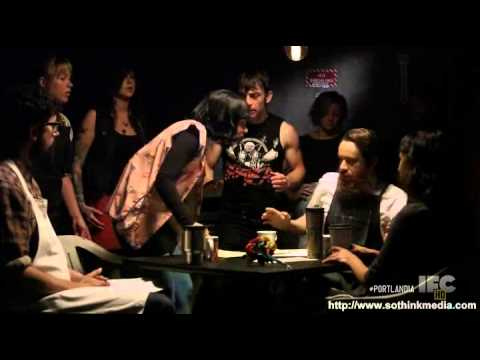

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/terrenceam22/Documents/Build/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [23]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head(20)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


In [59]:
# Importing Necessary Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
nlp = spacy.load("en_core_web_lg")

from collections import Counter
import re

import squarify
import matplotlib.pyplot as plt
import seaborn as sns



In [60]:
# Start here 
#shops.value_counts(normalize=True)

In [61]:
# Counting the raw text.
#shops['full_review_text'].value_counts(normalize=True)[:50]

In [62]:
# Tokenizing 'full_review_text' 
nlp = spacy.load("en_core_web_lg")
tokenize = Tokenizer(nlp.vocab)

shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops['tokens'].head()

0    ( , 11/25/2016, 1, check-in, Love, love, loved...
1    ( , 12/2/2016, Listed, in, Date, Night:, Austi...
2    ( , 11/30/2016, 1, check-in, Listed, in, Brunc...
3    ( , 11/25/2016, Very, cool, decor!, Good, drin...
4    ( , 12/3/2016, 1, check-in, They, are, located...
Name: tokens, dtype: object

In [63]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"( , 11/25/2016, 1, check-in, Love, love, loved..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","( , 12/2/2016, Listed, in, Date, Night:, Austi..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"( , 11/30/2016, 1, check-in, Listed, in, Brunc..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"( , 11/25/2016, Very, cool, decor!, Good, drin..."
4,12/3/2016 1 check-in They are located within ...,"( , 12/3/2016, 1, check-in, They, are, located..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"( , 11/20/2016, 1, check-in, Very, cute, cafe!..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","( , 10/27/2016, 2, check-ins, Listed, in, ""Nup..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"( , 11/2/2016, 2, check-ins, Love, this, place..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","( , 10/25/2016, 1, check-in, Ok,, let's, try, ..."
9,11/10/2016 3 check-ins This place has been sh...,"( , 11/10/2016, 3, check-ins, This, place, has..."


In [64]:
# Value counting by coffee shop rating
shops['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [67]:
tokens = []
""" Make them tokens """
for doc in tokenize.pipe(shops['full_review_text'], batch_size=1000):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens
print(shops)

                     coffee_shop_name  \
0     The Factory - Cafe With a Soul    
1     The Factory - Cafe With a Soul    
2     The Factory - Cafe With a Soul    
3     The Factory - Cafe With a Soul    
4     The Factory - Cafe With a Soul    
...                               ...   
7611               The Steeping Room    
7612               The Steeping Room    
7613               The Steeping Room    
7614               The Steeping Room    
7615               The Steeping Room    

                                       full_review_text        star_rating  \
0      11/25/2016 1 check-in Love love loved the atm...   5.0 star rating    
1      12/2/2016 Listed in Date Night: Austin, Ambia...   4.0 star rating    
2      11/30/2016 1 check-in Listed in Brunch Spots ...   4.0 star rating    
3      11/25/2016 Very cool decor! Good drinks Nice ...   2.0 star rating    
4      12/3/2016 1 check-in They are located within ...   4.0 star rating    
...                                    

In [68]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [69]:
wc = count(shops['tokens'])

In [70]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,the,6520,27779,1.0,0.034334,0.034334,0.856092
22,and,6804,25748,2.0,0.031824,0.066157,0.893382
1,,7616,22606,3.0,0.027940,0.094097,1.000000
31,a,6181,22085,4.0,0.027296,0.121394,0.811581
50,I,5469,19780,5.0,0.024447,0.145841,0.718093


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


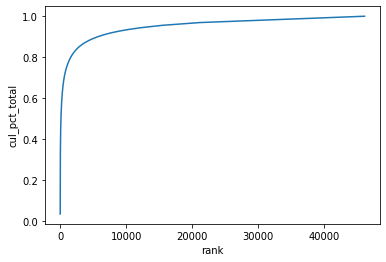

In [71]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [73]:
wc_top30 = wc[wc['rank'] <= 30]['cul_pct_total'].max()
wc_top30

0.34270974567629936

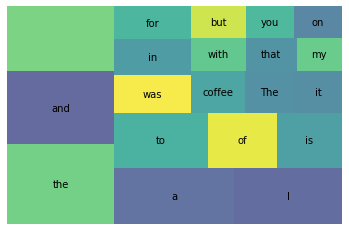

In [74]:
import squarify
import matplotlib.pyplot as plt

wc_top30 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top30['pct_total'], label=wc_top30['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [76]:
wc.head().word.iloc[0] == ' '


False

In [77]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [78]:
STOP_WORDS = nlp.Defaults.stop_words.union(["coffee",' ',"-","1","austin","it's","i'm","i've"])

In [80]:
tokens = []

for doc in tokenize.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [81]:
wc = count(shops['tokens'])
wc.head(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
116,place,3029,4264,1.0,0.011120,0.011120,0.397715
139,great,2438,3250,2.0,0.008475,0.019595,0.320116
189,like,2034,2902,3.0,0.007568,0.027163,0.267069
188,good,2084,2779,4.0,0.007247,0.034410,0.273634
34,check-in,1957,1961,5.0,0.005114,0.039524,0.256959
17,love,1434,1806,6.0,0.004710,0.044233,0.188288
804,little,1230,1479,7.0,0.003857,0.048090,0.161502
355,don't,1133,1395,8.0,0.003638,0.051728,0.148766
192,nice,1188,1368,9.0,0.003567,0.055295,0.155987
408,food,1092,1363,10.0,0.003554,0.058850,0.143382


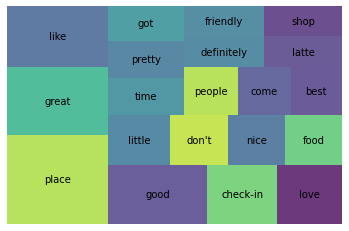

In [82]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


In [83]:
wc['appears_in_pct'].describe()


count    40482.000000
mean         0.001138
std          0.006382
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000525
max          0.397715
Name: appears_in_pct, dtype: float64

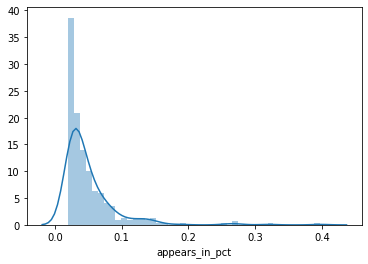

In [84]:
# Tree-Map w/ Words that appear in a least 2.0% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.02]

sns.distplot(wc['appears_in_pct']);

In [85]:
# Stemming


from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [86]:
stems = []
for doc in shops["tokens"]:
    doc_stems = [ps.stem(word) for word in doc]
    stems.append(doc_stems)

shops["stems"] = stems

In [87]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,..."


In [88]:
wc = count(shops['stems'])

In [89]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
114,place,3257,4769,1.0,0.012437,0.012437,0.427652
137,great,2441,3256,2.0,0.008491,0.020927,0.320509
181,like,2193,3193,3.0,0.008327,0.029254,0.287946
32,check-in,2979,2991,4.0,0.007800,0.037054,0.391150
180,good,2184,2935,5.0,0.007654,0.044708,0.286765


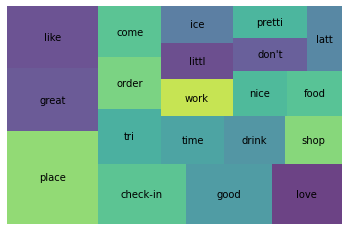

In [90]:
wc_top20 = wc[wc['rank'] <= 20]['cul_pct_total'].max()

import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [91]:
# Visualizing the difference between good and bad words
display(wc.head(),wc.tail())

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
114,place,3257,4769,1.0,0.012437,0.012437,0.427652
137,great,2441,3256,2.0,0.008491,0.020927,0.320509
181,like,2193,3193,3.0,0.008327,0.029254,0.287946
32,check-in,2979,2991,4.0,0.007800,0.037054,0.391150
180,good,2184,2935,5.0,0.007654,0.044708,0.286765


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35954,actuality.,1,1,35956.0,0.000003,0.999990,0.000131
35955,crass.,1,1,35957.0,0.000003,0.999992,0.000131
35956,restrictions.,1,1,35958.0,0.000003,0.999995,0.000131
35959,"specially,",1,1,35959.0,0.000003,0.999997,0.000131
35957,"digestion,",1,1,35960.0,0.000003,1.000000,0.000131


In [92]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,..."


In [93]:
# Copying dataset

shops_2 = shops.copy()

In [94]:
shops_2["star_rating"]= shops_2["star_rating"].str.replace("star rating","")

In [95]:
shops_2.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,..."


In [96]:
# Coverting Star Rating column to float
shops_2["star_rating"] = shops_2["star_rating"].astype('float')

In [97]:
shops_2["is_positive"] = shops_2["star_rating"] >= 3

In [98]:
shops_2.head()

,coffee_shop_name,full_review_text,star_rating,tokens,stems,is_positive
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,"[11/25/2016, check-in, love, love, loved, atmo...","[11/25/2016, check-in, love, love, love, atmos...",True
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,"[12/2/2016, listed, date, night:, austin,, amb...","[12/2/2016, list, date, night:, austin,, ambia...",True
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,"[11/30/2016, check-in, listed, brunch, spots, ...","[11/30/2016, check-in, list, brunch, spot, lov...",True
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,"[11/25/2016, cool, decor!, good, drinks, nice,...","[11/25/2016, cool, decor!, good, drink, nice, ...",False
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,"[12/3/2016, check-in, located, northcross, mal...","[12/3/2016, check-in, locat, northcross, mall,...",True


In [99]:
wc = count(shops['stems'])

In [100]:
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
114,place,3257,4769,1.0,0.012437,0.012437,0.427652
137,great,2441,3256,2.0,0.008491,0.020927,0.320509
181,like,2193,3193,3.0,0.008327,0.029254,0.287946
32,check-in,2979,2991,4.0,0.007800,0.037054,0.391150
180,good,2184,2935,5.0,0.007654,0.044708,0.286765
...,...,...,...,...,...,...,...
35954,actuality.,1,1,35956.0,0.000003,0.999990,0.000131
35955,crass.,1,1,35957.0,0.000003,0.999992,0.000131
35956,restrictions.,1,1,35958.0,0.000003,0.999995,0.000131
35959,"specially,",1,1,35959.0,0.000003,0.999997,0.000131


In [102]:
# Checking Count
wc.describe()

,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
count,35960.000000,35960.000000,35960.000000,35960.000000,35960.000000,35960.000000
mean,9.612458,10.663737,17980.500000,0.000028,0.918672,0.001262
std,57.845173,71.030659,10380.902177,0.000185,0.103020,0.007595
min,1.000000,1.000000,1.000000,0.000003,0.012437,0.000131
25%,1.000000,1.000000,8990.750000,0.000003,0.903348,0.000131
50%,1.000000,1.000000,17980.500000,0.000003,0.953113,0.000131
75%,4.000000,4.000000,26970.250000,0.000010,0.976557,0.000525
max,3257.000000,4769.000000,35960.000000,0.012437,1.000000,0.427652


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

